In [2]:
pip install visualkeras

     |████████████████████████████████| 795 kB 4.9 MB/s 


In [5]:
import os,re,gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import copy
import keras
from keras.models import Model
from keras import models as kmod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.activations import sigmoid

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import EfficientNetB0

import visualkeras

In [3]:
LABEL_COUNT = 31

In [33]:
def imgAug(inputs, size = True, rndAug = False):
  if(size and rndAug):
    img_augmentation = Sequential(
      [layers.RandomRotation(factor=0.15),
      layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
      layers.RandomFlip(),
      layers.RandomContrast(factor=0.1),
      layers.Resizing(224, 224, interpolation="bilinear", crop_to_aspect_ratio=True)],
      name="img_augmentation")
    return img_augmentation(inputs)
  if(size):
    img_augmentation = Sequential(
      [layers.Resizing(224, 224, interpolation="bilinear", crop_to_aspect_ratio=True)],
      name="img_augmentation")
    return img_augmentation(inputs)
  if(rndAug):
    img_augmentation = Sequential(
      [layers.RandomRotation(factor=0.15),
      layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
      layers.RandomFlip(),
      layers.RandomContrast(factor=0.1)],
      name="img_augmentation")
    return img_augmentation(inputs)
  img_augmentation = Sequential(name="img_augmentation")
  return img_augmentation(inputs)

In [15]:
def model_ZFN(inputs = (100,140,3),output = 31):
  model = Sequential([
    Conv2D(filters = 5, 
           kernel_size = (5,5), 
           strides = 2,
           activation = 'relu', 
           input_shape=inputs),
    MaxPooling2D(pool_size = (3,3),
                 strides = 2),
    Conv2D(filters = 256, 
           kernel_size = (3,3), 
           activation = 'relu'),
    Conv2D(filters = 384, 
           kernel_size = (3,3), 
           activation = 'relu'),
    MaxPooling2D(pool_size = (3,3),
                 strides = 2),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(2096, activation = 'relu'),
    Dense(output)  
    ])
  return model, 'ZFNet'

mZFN ,_n = model_ZFN(output=LABEL_COUNT)



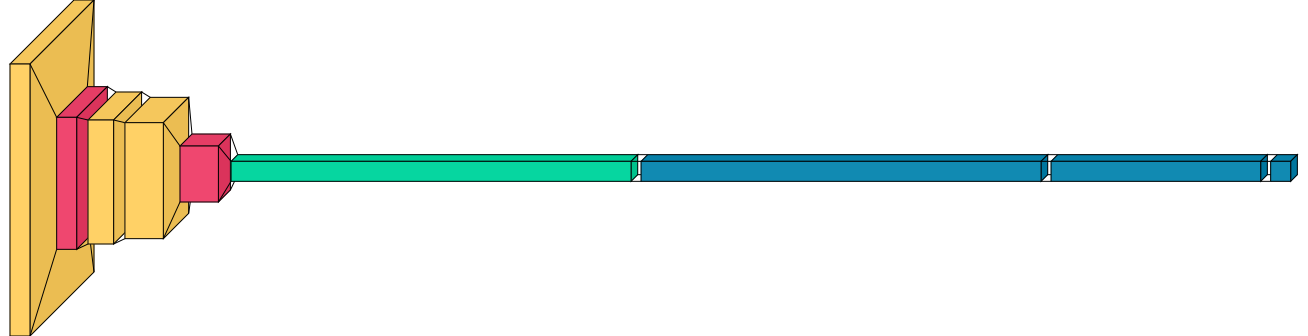

In [16]:
visualkeras.layered_view(mZFN)

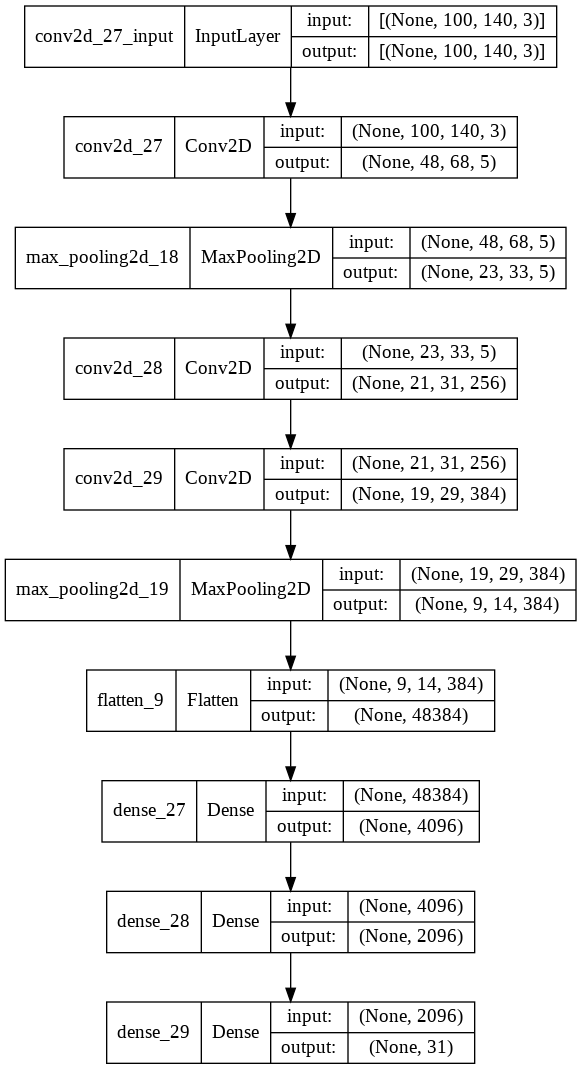

In [17]:
keras.utils.plot_model(mZFN, show_shapes=True, show_layer_names=True)

In [28]:
def model_VGG(inputs = (100,140,3),output = 31):
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=inputs),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(output, activation='softmax'),
    ])
  return model, 'VGG'

mVGG ,_n = model_VGG(output=LABEL_COUNT)

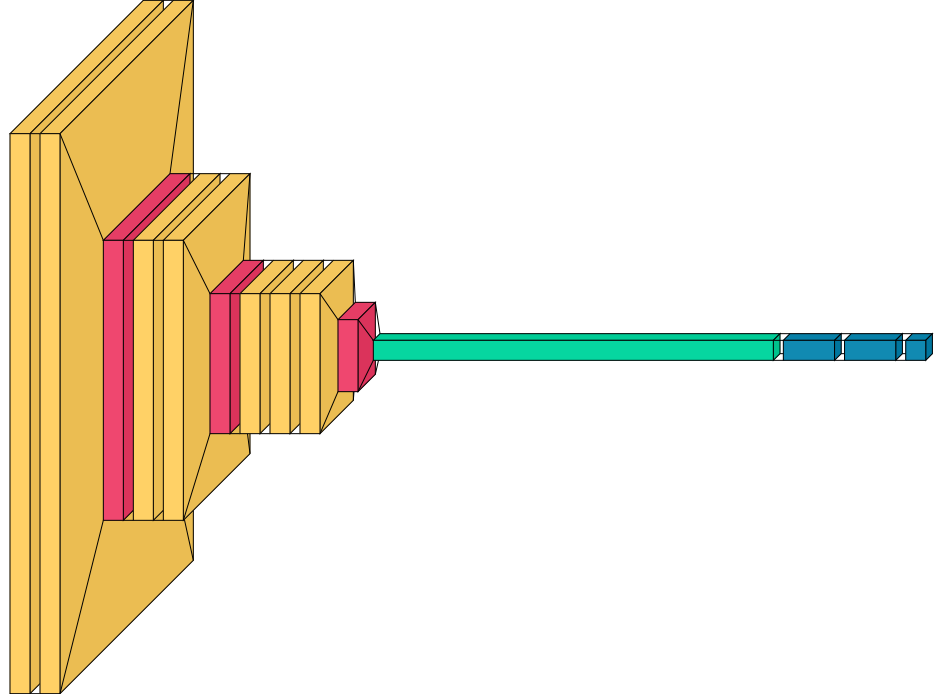

In [29]:
visualkeras.layered_view(mVGG)

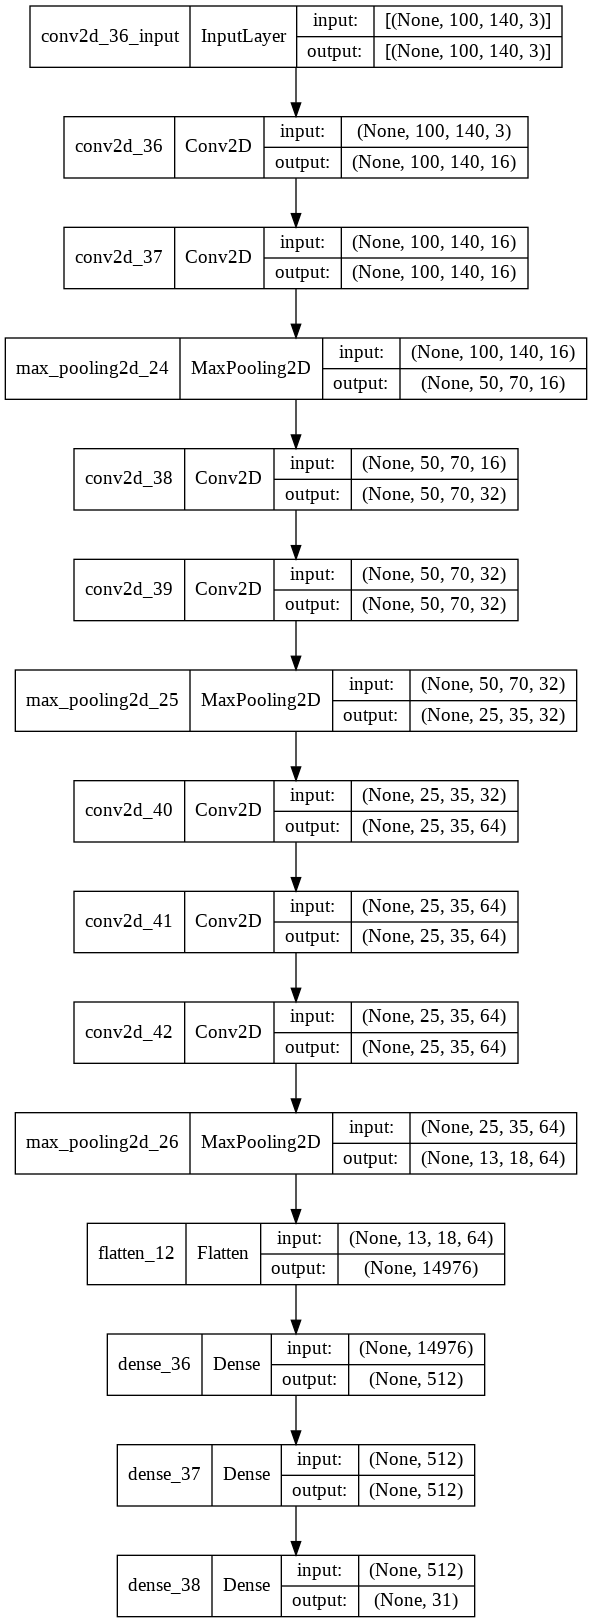

In [30]:
keras.utils.plot_model(mVGG, show_shapes=True, show_layer_names=True)

In [34]:
def model_ResNet(inputs = (100,140,3),output = 31):
  inputs = layers.Input(shape=inputs)
  x = imgAug(inputs)
  outputs = ResNet50(include_top=True, weights=None, classes=output)(x)
  model = tf.keras.Model(inputs, outputs)
  return model, 'ResNet'

In [36]:
mRN = ResNet50(include_top=True, weights=None, classes=LABEL_COUNT)

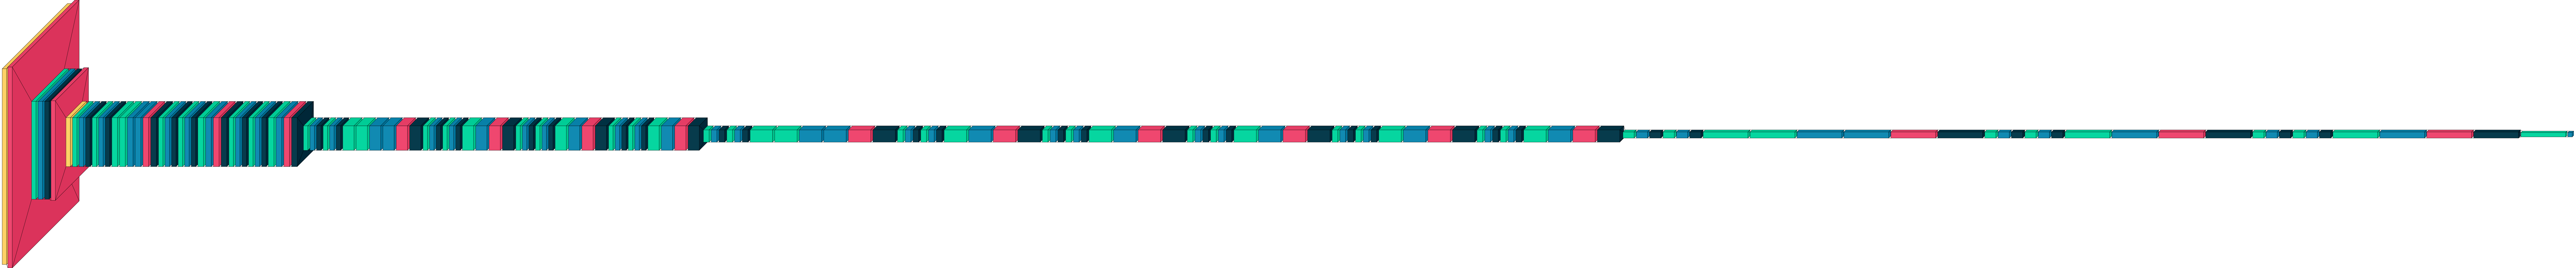

In [41]:
visualkeras.layered_view(mRN)

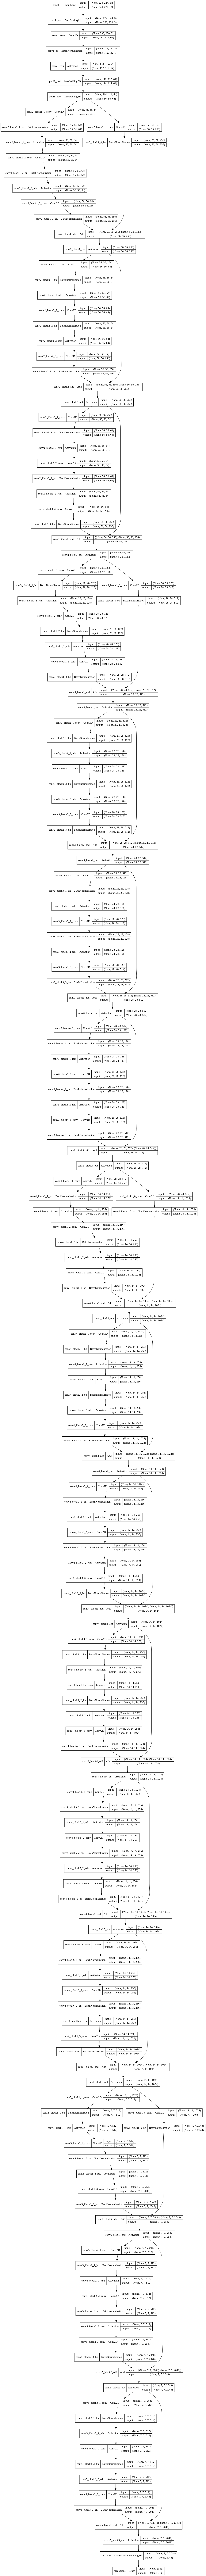

In [42]:
keras.utils.plot_model(mRN, show_shapes=True, show_layer_names=True)

In [ ]:
def model_EffectiveNet(inputs = (100,140,3),output = 31):
  inputs = layers.Input(shape=inputs)
  x = imgAug(inputs)
  outputs = EfficientNetB0(include_top=True, weights=None, classes=output)(x)

  model = tf.keras.Model(inputs, outputs)
  return model, 'EffNet'

In [38]:
mEN = EfficientNetB0(include_top=True, weights=None, classes=LABEL_COUNT)

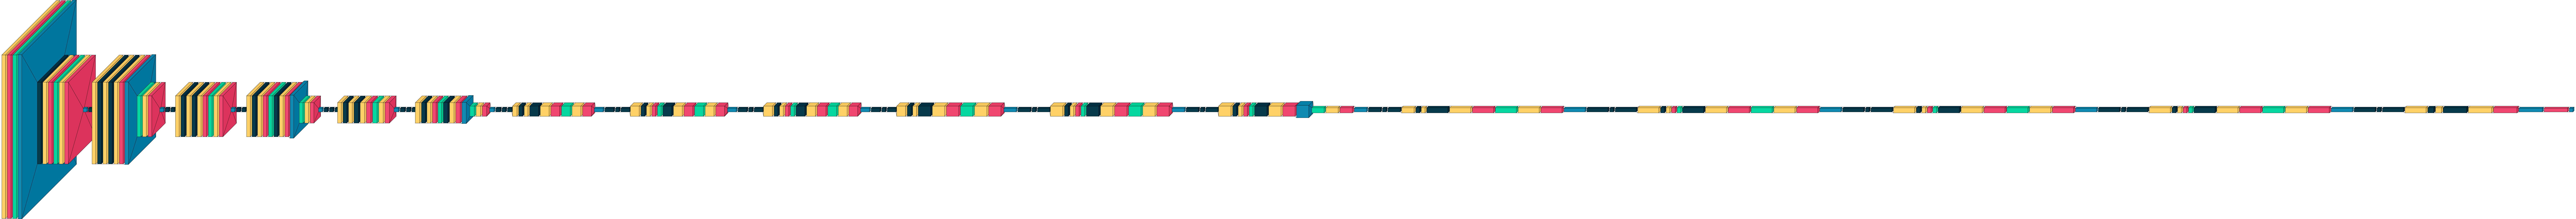

In [39]:
visualkeras.layered_view(mEN)

In [40]:
keras.utils.plot_model(mEN, show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:


m = model_VGG()
m = model_ZFN()
m = model_ResNet()
m = model_EffectiveNet()

#to autobuild all models
def build_models():
  models = list()

  models.append(model_ZFN(output=LABEL_COUNT))
  models.append(model_VGG(output=LABEL_COUNT))
  models.append(model_ResNet(output=LABEL_COUNT))
  models.append(model_EffectiveNet(output=LABEL_COUNT))

  return models

#compile all models
def comp_models(models):

  for i in range(len(models)):
    models[i][0].compile(optimizer='adam',
              loss="categorical_crossentropy",#loss='mse',
              metrics=['accuracy'])

  return models

def setup_model():
  classification_models = build_models()
  return comp_models(classification_models)